In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras

In [8]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
# Train data를 훈련데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


In [9]:
# 모델 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [13]:
model = model_fn()
# model.summary()

# 훈련 및 과정에 대한 history보기
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5,verbose=1)

Epoch 1/5


2023-02-28 17:23:07.720539: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 1s 603us/step - loss: 0.5311 - accuracy: 0.8124
Epoch 2/5
1500/1500 [==============================] - 1s 564us/step - loss: 0.3935 - accuracy: 0.8581
Epoch 3/5
1500/1500 [==============================] - 1s 570us/step - loss: 0.3552 - accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 1s 557us/step - loss: 0.3337 - accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 1s 513us/step - loss: 0.3189 - accuracy: 0.8854


In [19]:
# 학습 내용이 history에 저장됨
history.history.keys()

dict_keys(['loss', 'accuracy'])

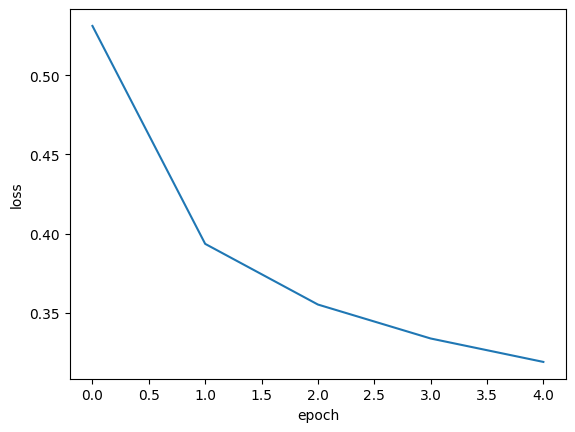

In [20]:
# history loss의 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

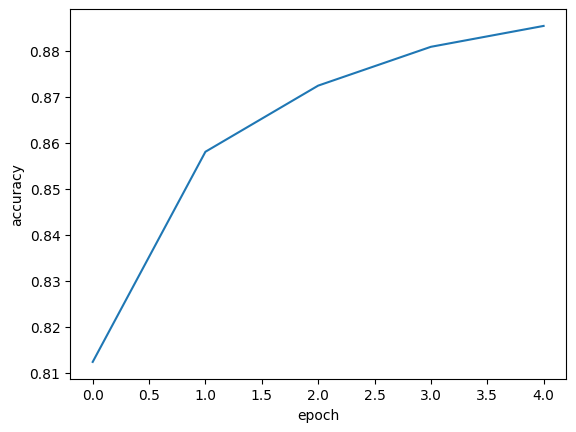

In [21]:
# history accuracy의 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [22]:
# epoch를 증가시켜 재학습
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=1)
# ***********주의***********

Epoch 1/20
1500/1500 [==============================] - 1s 646us/step - loss: 0.3076 - accuracy: 0.8894
Epoch 2/20
1500/1500 [==============================] - 1s 542us/step - loss: 0.2997 - accuracy: 0.8939
Epoch 3/20
1500/1500 [==============================] - 1s 518us/step - loss: 0.2889 - accuracy: 0.8980
Epoch 4/20
1500/1500 [==============================] - 1s 590us/step - loss: 0.2820 - accuracy: 0.9004
Epoch 5/20
1500/1500 [==============================] - 1s 516us/step - loss: 0.2739 - accuracy: 0.9040
Epoch 6/20
1500/1500 [==============================] - 1s 528us/step - loss: 0.2709 - accuracy: 0.9060
Epoch 7/20
1500/1500 [==============================] - 1s 525us/step - loss: 0.2642 - accuracy: 0.9075
Epoch 8/20
1500/1500 [==============================] - 1s 518us/step - loss: 0.2561 - accuracy: 0.9108
Epoch 9/20
1500/1500 [==============================] - 1s 526us/step - loss: 0.2530 - accuracy: 0.9127
Epoch 10/20
1500/1500 [==============================] - 1s 593u

In [23]:
# 전의 결과를 갖고 있기 때문에 모델을 다시 정의해줘야 함
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=1)

Epoch 1/20
1500/1500 [==============================] - 1s 618us/step - loss: 0.5352 - accuracy: 0.8102
Epoch 2/20
1500/1500 [==============================] - 1s 529us/step - loss: 0.3986 - accuracy: 0.8573
Epoch 3/20
1500/1500 [==============================] - 1s 855us/step - loss: 0.3578 - accuracy: 0.8721
Epoch 4/20
1500/1500 [==============================] - 1s 775us/step - loss: 0.3376 - accuracy: 0.8794
Epoch 5/20
1500/1500 [==============================] - 1s 561us/step - loss: 0.3208 - accuracy: 0.8864
Epoch 6/20
1500/1500 [==============================] - 1s 557us/step - loss: 0.3109 - accuracy: 0.8900
Epoch 7/20
1500/1500 [==============================] - 1s 532us/step - loss: 0.2990 - accuracy: 0.8938
Epoch 8/20
1500/1500 [==============================] - 1s 530us/step - loss: 0.2919 - accuracy: 0.8963
Epoch 9/20
1500/1500 [==============================] - 1s 571us/step - loss: 0.2842 - accuracy: 0.8988
Epoch 10/20
1500/1500 [==============================] - 1s 543u

---
### 검증 손실
: 검증세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [28]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=1, validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 1s 688us/step - loss: 0.5337 - accuracy: 0.8138 - val_loss: 0.4156 - val_accuracy: 0.8500
Epoch 2/20
1500/1500 [==============================] - 1s 608us/step - loss: 0.3918 - accuracy: 0.8586 - val_loss: 0.4182 - val_accuracy: 0.8548
Epoch 3/20
1500/1500 [==============================] - 1s 699us/step - loss: 0.3552 - accuracy: 0.8711 - val_loss: 0.3568 - val_accuracy: 0.8721
Epoch 4/20
1500/1500 [==============================] - 1s 630us/step - loss: 0.3355 - accuracy: 0.8790 - val_loss: 0.3625 - val_accuracy: 0.8758
Epoch 5/20
1500/1500 [==============================] - 1s 598us/step - loss: 0.3199 - accuracy: 0.8854 - val_loss: 0.3470 - val_accuracy: 0.8813
Epoch 6/20
1500/1500 [==============================] - 1s 598us/step - loss: 0.3074 - accuracy: 0.8908 - val_loss: 0.3724 - val_accuracy: 0.8776
Epoch 7/20
1500/1500 [==============================] - 1s 588us/step - loss: 0.2987 - accuracy: 0.8946 - val_loss: 0.3788 -

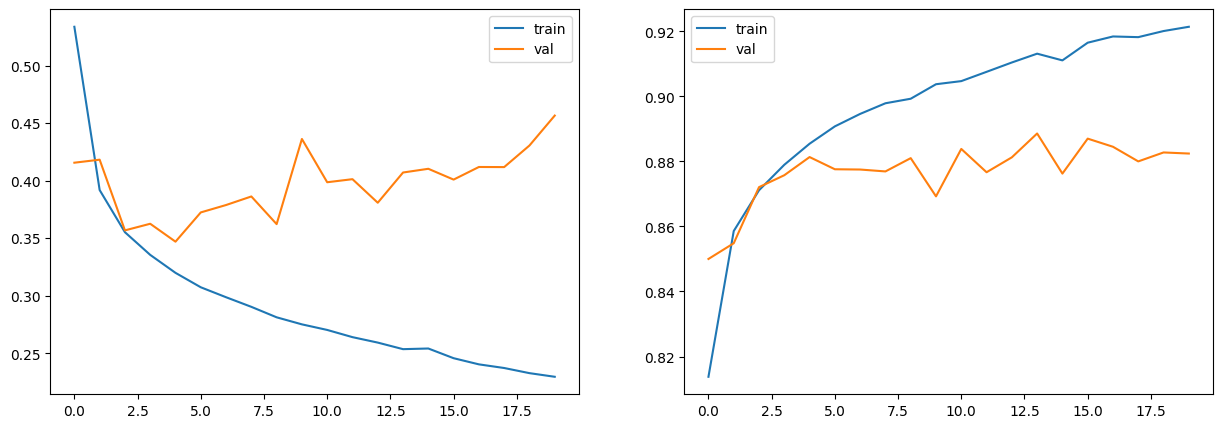

In [38]:
# history loss의 시각화
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])

# history accuracy의 시각화
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.legend(['train','val'])
ax2.legend(['train','val'])
plt.show()

> 과대적합 발생

### Optimizer 추가 후 재학습

In [43]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=1, validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 1s 696us/step - loss: 0.5249 - accuracy: 0.8178 - val_loss: 0.4668 - val_accuracy: 0.8332
Epoch 2/20
1500/1500 [==============================] - 1s 582us/step - loss: 0.3971 - accuracy: 0.8576 - val_loss: 0.4119 - val_accuracy: 0.8491
Epoch 3/20
1500/1500 [==============================] - 1s 595us/step - loss: 0.3574 - accuracy: 0.8697 - val_loss: 0.4161 - val_accuracy: 0.8517
Epoch 4/20
1500/1500 [==============================] - 1s 557us/step - loss: 0.3304 - accuracy: 0.8796 - val_loss: 0.3695 - val_accuracy: 0.8646
Epoch 5/20
1500/1500 [==============================] - 1s 556us/step - loss: 0.3087 - accuracy: 0.8861 - val_loss: 0.3480 - val_accuracy: 0.8762
Epoch 6/20
1500/1500 [==============================] - 1s 596us/step - loss: 0.2932 - accuracy: 0.8919 - val_loss: 0.3835 - val_accuracy: 0.8648
Epoch 7/20
1500/1500 [==============================] - 1s 600us/step - loss: 0.2802 - accuracy: 0.8965 - val_loss: 0.3290 -

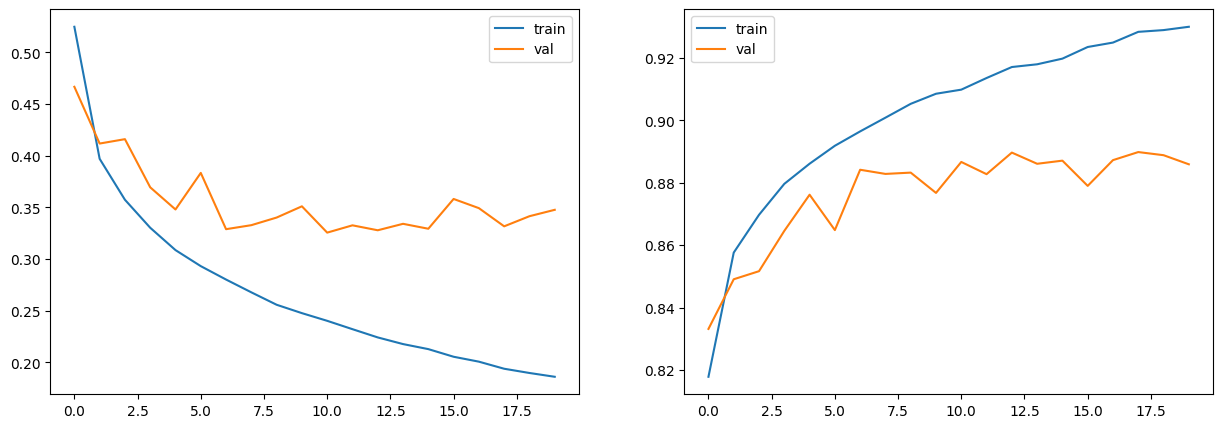

In [44]:
# history loss의 시각화
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])

# history accuracy의 시각화
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.legend(['train','val'])
ax2.legend(['train','val'])
plt.show()

> 나아지긴 했지만 아직 과대적합

In [45]:
# def model_fn(a_layer=None):
#     model = keras.Sequential()
#     model.add(keras.layers.Flatten(input_shape=(28,28)))
#     model.add(keras.layers.Dense(100,activation='relu'))
#     if a_layer:
#         model.add(a_layer)
#     model.add(keras.layers.Dense(10,activation='softmax'))
#     return model

# a_layer <- 규제
# 30% dropout
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=1, validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 1s 639us/step - loss: 0.5859 - accuracy: 0.7961 - val_loss: 0.4315 - val_accuracy: 0.8407
Epoch 2/20
1500/1500 [==============================] - 1s 607us/step - loss: 0.4389 - accuracy: 0.8426 - val_loss: 0.3792 - val_accuracy: 0.8611
Epoch 3/20
1500/1500 [==============================] - 1s 544us/step - loss: 0.4027 - accuracy: 0.8547 - val_loss: 0.3817 - val_accuracy: 0.8603
Epoch 4/20
1500/1500 [==============================] - 1s 555us/step - loss: 0.3834 - accuracy: 0.8605 - val_loss: 0.3624 - val_accuracy: 0.8677
Epoch 5/20
1500/1500 [==============================] - 1s 629us/step - loss: 0.3633 - accuracy: 0.8678 - val_loss: 0.3373 - val_accuracy: 0.8774
Epoch 6/20
1500/1500 [==============================] - 1s 638us/step - loss: 0.3517 - accuracy: 0.8707 - val_loss: 0.3410 - val_accuracy: 0.8740
Epoch 7/20
1500/1500 [==============================] - 1s 564us/step - loss: 0.3424 - accuracy: 0.8737 - val_loss: 0.3354 -

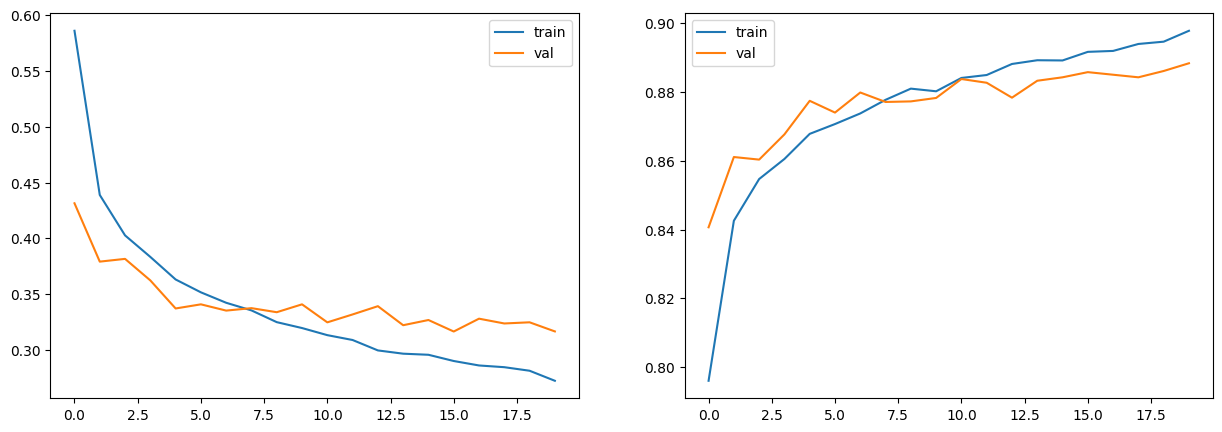

In [46]:
# history loss의 시각화
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])

# history accuracy의 시각화
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.legend(['train','val'])
ax2.legend(['train','val'])
plt.show()

> epoch: 20->10

In [60]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=8,verbose=1, validation_data=(val_scaled,val_target))

Epoch 1/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5922 - accuracy: 0.7902 - val_loss: 0.4576 - val_accuracy: 0.8328
Epoch 2/8
1500/1500 [==============================] - 1s 747us/step - loss: 0.4362 - accuracy: 0.8430 - val_loss: 0.3902 - val_accuracy: 0.8577
Epoch 3/8
1500/1500 [==============================] - 1s 568us/step - loss: 0.4042 - accuracy: 0.8535 - val_loss: 0.3778 - val_accuracy: 0.8631
Epoch 4/8
1500/1500 [==============================] - 1s 526us/step - loss: 0.3776 - accuracy: 0.8626 - val_loss: 0.3615 - val_accuracy: 0.8686
Epoch 5/8
1500/1500 [==============================] - 1s 580us/step - loss: 0.3625 - accuracy: 0.8680 - val_loss: 0.3442 - val_accuracy: 0.8748
Epoch 6/8
1500/1500 [==============================] - 1s 566us/step - loss: 0.3538 - accuracy: 0.8703 - val_loss: 0.3520 - val_accuracy: 0.8703
Epoch 7/8
1500/1500 [==============================] - 1s 577us/step - loss: 0.3384 - accuracy: 0.8745 - val_loss: 0.3401 - val_accu

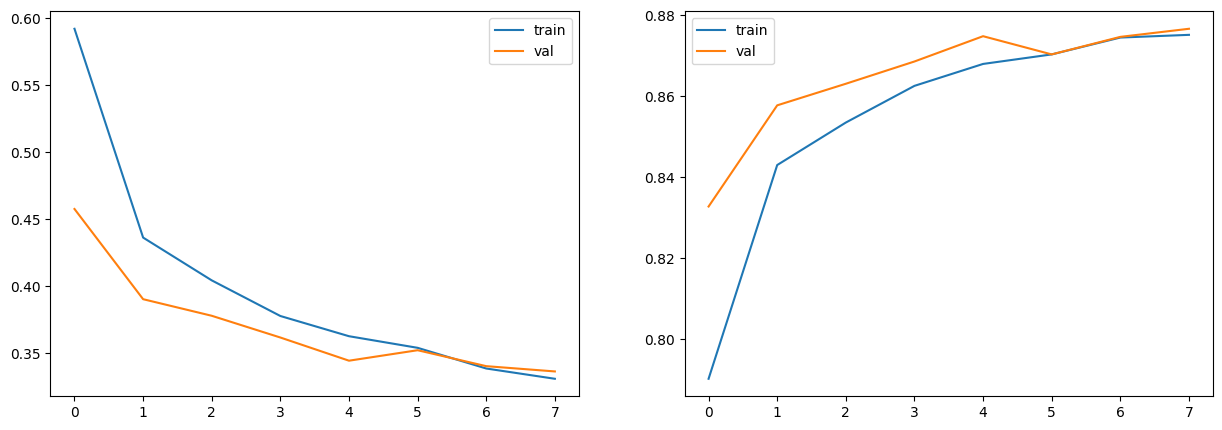

In [61]:
# history loss의 시각화
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])

# history accuracy의 시각화
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.legend(['train','val'])
ax2.legend(['train','val'])
plt.show()

---
### 모델의 저장과 복원
- hdf5 format으로 저장

In [49]:
# 모델의 전체를 저장
model.save("./Data/model_whole.h5")

In [50]:
# 복원
model = keras.models.load_model("./Data/model_whole.h5")

In [51]:
# load한 model test
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 371us/step - loss: 0.3350 - accuracy: 0.8755


[0.33498212695121765, 0.8755000233650208]

---
### Callbacks
- 훈련 수행 시 손실값이 가장 작은 함수를 저장한다. <- 매번 학습-검증이 필요없음


In [52]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# loss가 제일 작은 모델을 best_model.h5로 저장하는 체크포인트
checkpoint_cb = keras.callbacks.ModelCheckpoint("./Data/best_model.h5")
# callbacks 추가 (epoch에 관계없이 가장 잘 나온 모델을 저장함)
history = model.fit(train_scaled,train_target,epochs=10,verbose=1, validation_data=(val_scaled,val_target),callbacks=checkpoint_cb)

Epoch 1/10
1500/1500 [==============================] - 1s 669us/step - loss: 0.5902 - accuracy: 0.7897 - val_loss: 0.4163 - val_accuracy: 0.8471
Epoch 2/10
1500/1500 [==============================] - 1s 661us/step - loss: 0.4402 - accuracy: 0.8420 - val_loss: 0.3863 - val_accuracy: 0.8584
Epoch 3/10
1500/1500 [==============================] - 1s 627us/step - loss: 0.4040 - accuracy: 0.8533 - val_loss: 0.3571 - val_accuracy: 0.8681
Epoch 4/10
1500/1500 [==============================] - 1s 610us/step - loss: 0.3821 - accuracy: 0.8587 - val_loss: 0.3581 - val_accuracy: 0.8677
Epoch 5/10
1500/1500 [==============================] - 1s 555us/step - loss: 0.3665 - accuracy: 0.8669 - val_loss: 0.3610 - val_accuracy: 0.8671
Epoch 6/10
1500/1500 [==============================] - 1s 561us/step - loss: 0.3522 - accuracy: 0.8683 - val_loss: 0.3405 - val_accuracy: 0.8765
Epoch 7/10
1500/1500 [==============================] - 1s 571us/step - loss: 0.3451 - accuracy: 0.8721 - val_loss: 0.3377 -

In [53]:
best_model = keras.models.load_model("./Data/best_model.h5")
best_model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 404us/step - loss: 0.3312 - accuracy: 0.8778


[0.3312162756919861, 0.8778333067893982]

> callbacks의 단점: epoch가 모두 끝나야 함  
> early stopping (조기 종료)으로 보완

## Early Stopping 조기종료

In [62]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# loss가 제일 작은 모델을 best_model.h5로 저장하는 체크포인트
checkpoint_cb = keras.callbacks.ModelCheckpoint("./Data/best_model.h5")
# 손실률이 떨어지다가 다시 올라올 때 2번까지 (patience) 진행한다
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=8,verbose=1, validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/8
1500/1500 [==============================] - 2s 710us/step - loss: 0.5944 - accuracy: 0.7893 - val_loss: 0.4479 - val_accuracy: 0.8357
Epoch 2/8
1500/1500 [==============================] - 1s 571us/step - loss: 0.4416 - accuracy: 0.8400 - val_loss: 0.3832 - val_accuracy: 0.8636
Epoch 3/8
1500/1500 [==============================] - 1s 565us/step - loss: 0.4039 - accuracy: 0.8524 - val_loss: 0.3539 - val_accuracy: 0.8712
Epoch 4/8
1500/1500 [==============================] - 1s 567us/step - loss: 0.3838 - accuracy: 0.8603 - val_loss: 0.3549 - val_accuracy: 0.8661
Epoch 5/8
1500/1500 [==============================] - 1s 552us/step - loss: 0.3675 - accuracy: 0.8663 - val_loss: 0.3483 - val_accuracy: 0.8700
Epoch 6/8
1500/1500 [==============================] - 1s 640us/step - loss: 0.3560 - accuracy: 0.8673 - val_loss: 0.3477 - val_accuracy: 0.8690
Epoch 7/8
1500/1500 [==============================] - 1s 567us/step - loss: 0.3458 - accuracy: 0.8723 - val_loss: 0.3307 - val_ac

In [57]:
# 몇 번째 epoch에서 stop되었는가?
early_stopping_cb.stopped_epoch

9

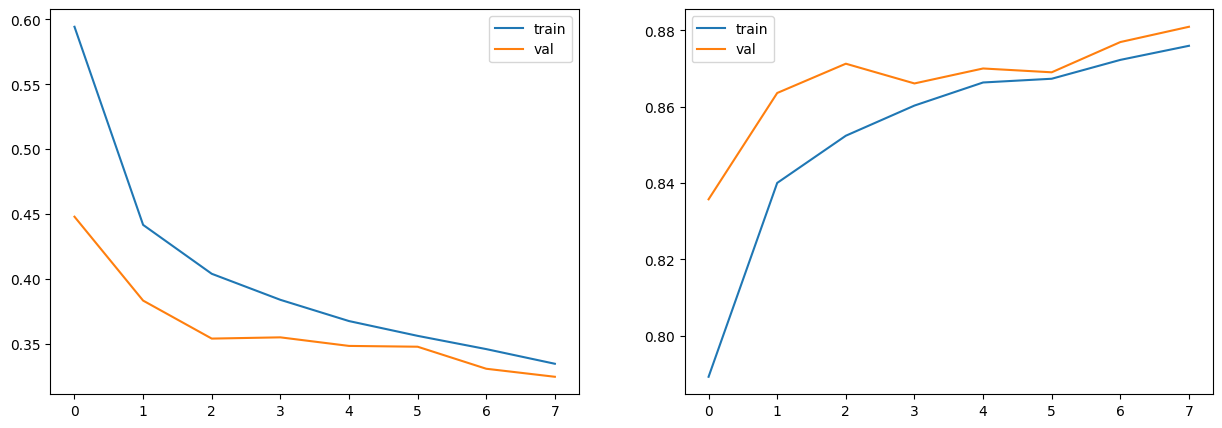

In [63]:
# history loss의 시각화
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])

# history accuracy의 시각화
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.legend(['train','val'])
ax2.legend(['train','val'])
plt.show()